****PREDICTING BMW SALES****

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [2]:
df=pd.read_csv('D:\Data Science With Python\dataset\Both linear and logistics\BMW sales data (2010-2024).csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dines\AppData\Local\Temp\ipykernel_17644\1420965417.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('D:\Data Science With Python\dataset\Both linear and logistics\BMW sales data (2010-2024).csv')


**Feature Engineering**

In [3]:
df.head(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [5]:
df[['Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']].corr()

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
Engine_Size_L,1.000000,-0.004906,0.000146,-0.003942
Mileage_KM,-0.004906,1.000000,-0.004238,0.001434
Price_USD,0.000146,-0.004238,1.000000,0.000080
Sales_Volume,-0.003942,0.001434,0.000080,1.000000


In [6]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


**Plots**

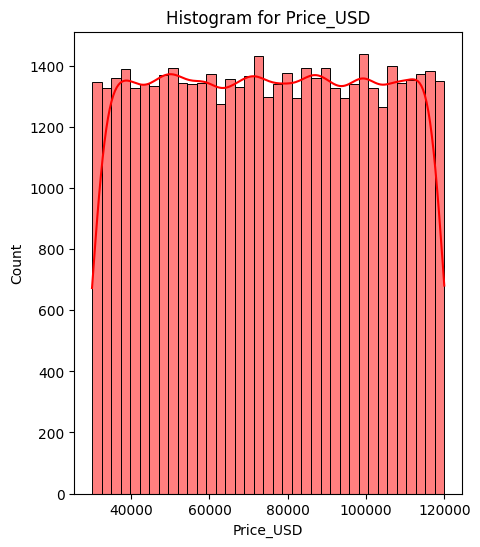

In [9]:
plt.figure(figsize=(5,6))
sns.histplot(df['Price_USD'],kde=True,color='red')
plt.title('Histogram for Price_USD')
plt.show()
#All integer columns are having normal distribution except year
#This is normal distribution.

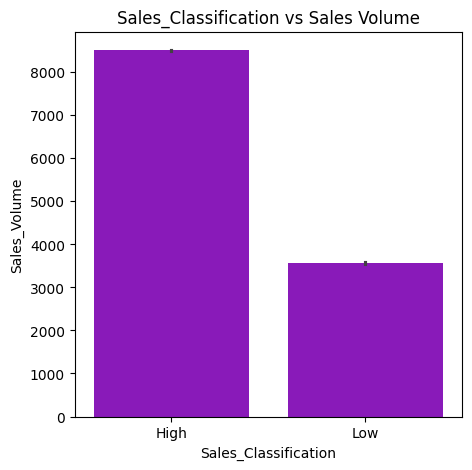

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sales_Classification',y='Sales_Volume',data=df,color='darkviolet')	
plt.title('Sales_Classification vs Sales Volume')
plt.show()
#This graph shows High sales highest point is above 8000
#Low sales is shows that product may be high price

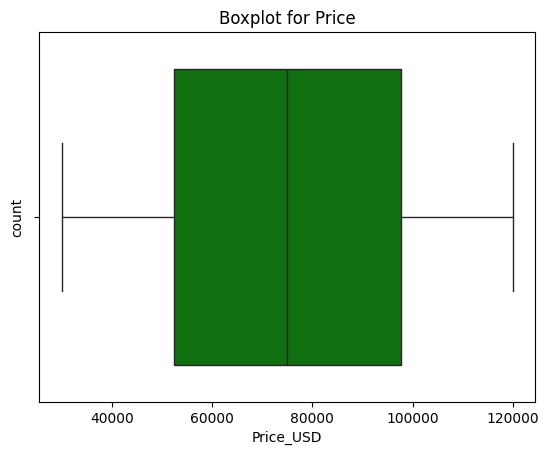

In [11]:
sns.boxplot(x='Price_USD',data=df,color='green')
plt.ylabel('count')
plt.title('Boxplot for Price')
plt.show()
#Lower bound=upper bound
#Maximum product price is 50000-100000

In [12]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [13]:
df['Fuel_Type'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

In [14]:
pie=df['Fuel_Type'].value_counts()
pie

Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

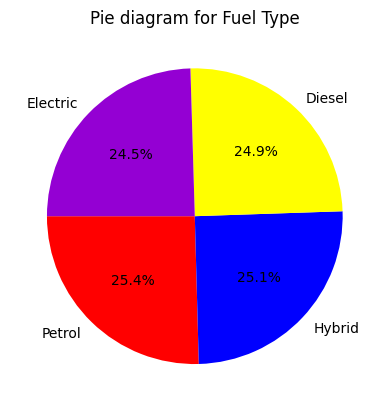

In [15]:
pie=df['Fuel_Type'].value_counts()
plt.pie(pie,labels=['Petrol', 'Hybrid', 'Diesel', 'Electric'],autopct='%1.1f%%',colors=['red','blue','yellow','darkviolet'],startangle=180)
plt.title('Pie diagram for Fuel Type')
plt.show()
#Petrol car and hybrid car is greater than 25%
#Diesel car and electric car is less than 25%

In [16]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


<Figure size 400x900 with 0 Axes>

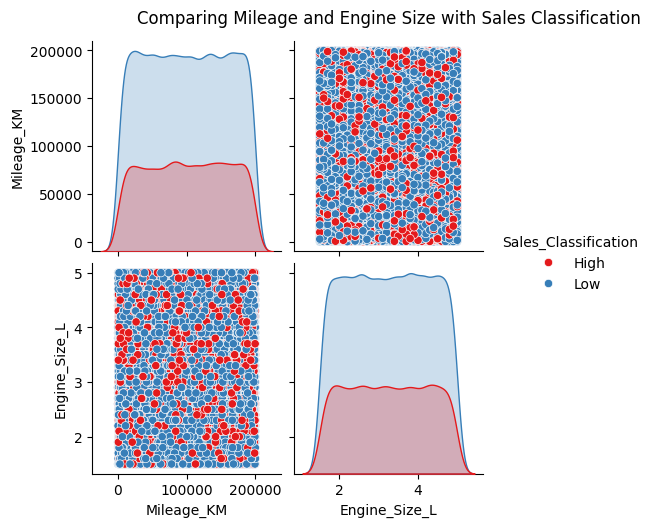

In [17]:
plt.figure(figsize=(4,9))
sns.pairplot(df[['Mileage_KM','Engine_Size_L','Sales_Classification']],hue='Sales_Classification',palette='Set1')
plt.title('Comparing Mileage and Engine Size with Sales Classification',y=2.1)
plt.show()
#Sales classification low cars are give enormous mileage comparatively high cars
#Engine size is also high in low sales classification cars may be that is a reason of high mileage
#High sales classification cars are very lower than low sales classification cars

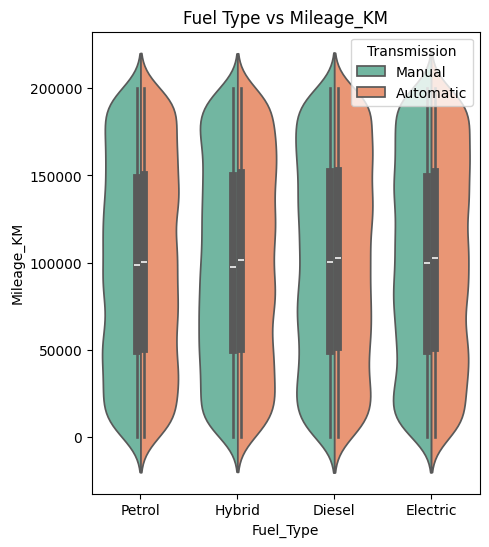

In [18]:
plt.figure(figsize=(5,6))
sns.violinplot(data=df,x='Fuel_Type',y='Mileage_KM',hue='Transmission',split=True,palette='Set2')
plt.title('Fuel Type vs Mileage_KM')
plt.show()  
#Sales of the car's  Transmission and Fuel type is balanced

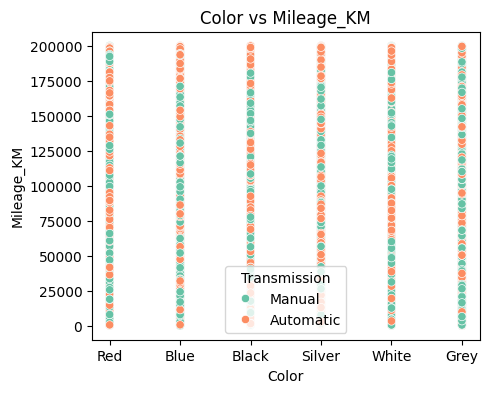

In [19]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Color',y='Mileage_KM',hue='Transmission',palette='Set2')
plt.title('Color vs Mileage_KM')
plt.show()
#Color of the car is not affecting Mileage
#Transmission is also not affecting Mileage
#This graph shows it is negative corelation


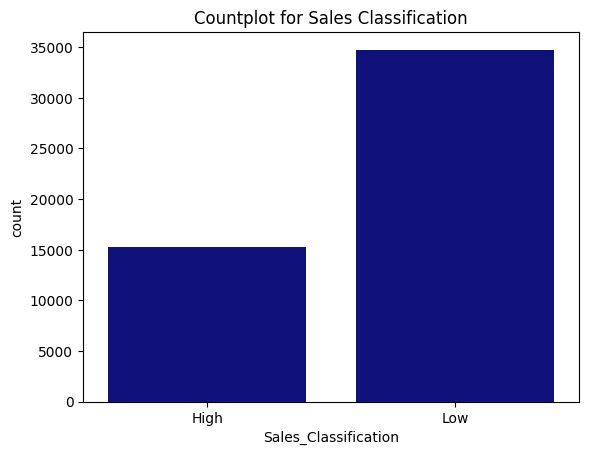

In [20]:
sns.countplot(x=df['Sales_Classification'],color='darkblue')
plt.title('Countplot for Sales Classification')
plt.show()
#Low cars sales are more than high sales cars

**Using smote to balance this column**

In [21]:
from imblearn.under_sampling import RandomUnderSampler
x=df.drop(columns="Sales_Classification",axis=1)
y=df["Sales_Classification"]
rus=RandomUnderSampler(sampling_strategy="majority")
x_sm,y_sm=rus.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)

(30492, 10)
(30492,)


In [57]:
y_sm.value_counts()

Sales_Classification
High    15246
Low     15246
Name: count, dtype: int64

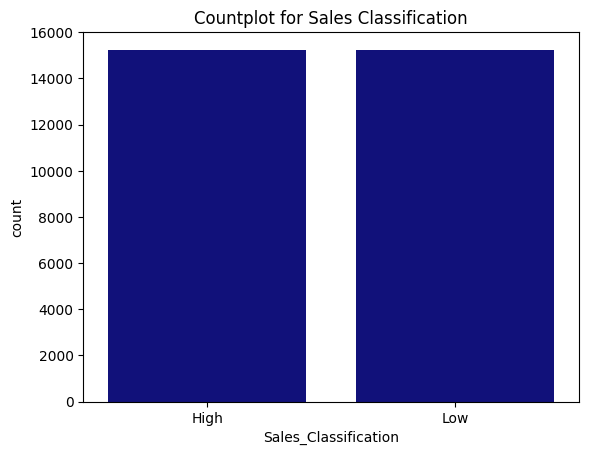

In [23]:
sns.countplot(x=y_sm,color='darkblue')
plt.title('Countplot for Sales Classification')
plt.show()
#Equally balanced using SMOTE technique

**Feature Engineering**

In [24]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()
oe=OrdinalEncoder()
df['Model']=oe.fit_transform(df[['Model']])
df['Region']=oe.fit_transform(df[['Region']])
df['Color']=oe.fit_transform(df[['Color']])
df['Fuel_Type']=oe.fit_transform(df[['Fuel_Type']])
df['Transmission']=oe.fit_transform(df[['Transmission']])
df['Sales_Classification']=le.fit_transform(df['Sales_Classification'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  float64
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  float64
 3   Color                 50000 non-null  float64
 4   Fuel_Type             50000 non-null  float64
 5   Transmission          50000 non-null  float64
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 4.2 MB


*Fit x and y*

In [25]:
x=df.drop(columns='Sales_Classification',axis=1)
y=df['Sales_Classification']
x

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,1.0,2016,1.0,3.0,3.0,1.0,3.5,151748,98740,8300
1,10.0,2013,4.0,3.0,2.0,0.0,1.6,121671,79219,3428
2,1.0,2022,4.0,1.0,3.0,0.0,4.5,10991,113265,6994
3,6.0,2024,3.0,1.0,3.0,0.0,1.7,27255,60971,4047
4,2.0,2020,5.0,0.0,0.0,1.0,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,9.0,2014,1.0,3.0,2.0,1.0,4.6,151030,42932,8182
49996,9.0,2023,3.0,4.0,1.0,1.0,4.2,147396,48714,9816
49997,1.0,2010,3.0,3.0,3.0,0.0,4.5,174939,46126,8280
49998,9.0,2020,1.0,5.0,1.0,0.0,3.8,3379,58566,9486


In [26]:
y

0        0
1        1
2        1
3        1
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: Sales_Classification, Length: 50000, dtype: int64

*Normalisation the input features*

In [27]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(x)

array([[-1.25806426e+00, -2.34875647e-01, -8.78596907e-01, ...,
         8.87814485e-01,  9.11816648e-01,  1.13152998e+00],
       [ 1.57595281e+00, -9.28610944e-01,  8.82447724e-01, ...,
         3.68716845e-01,  1.60950876e-01, -5.73911349e-01],
       [-1.25806426e+00,  1.15259495e+00,  8.82447724e-01, ...,
        -1.54150448e+00,  1.47051371e+00,  6.74365288e-01],
       ...,
       [-1.25806426e+00, -1.62234624e+00,  2.95432847e-01, ...,
         1.28806695e+00, -1.11195528e+00,  1.12452899e+00],
       [ 1.26106202e+00,  6.90104749e-01, -8.78596907e-01, ...,
        -1.67287966e+00, -6.33456725e-01,  1.54668873e+00],
       [ 1.49888014e-03,  6.90104749e-01,  8.82447724e-01, ...,
         1.22013570e+00,  9.45226613e-02, -1.15639377e+00]],
      shape=(50000, 10))

**Fit x_train,y_train into models**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3024    3]
 [   8 6965]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3027
           1       1.00      1.00      1.00      6973

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

0.9989


d:\Data Science With Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)            
print(y_pred)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

d:\Data Science With Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1 1 1 ... 1 0 1]
[[3028    4]
 [   4 6964]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

0.9992


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3032    0]
 [   0 6968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

1.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3032    0]
 [   0 6968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

1.0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3032    0]
 [   0 6968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

1.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3032    0]
 [   0 6968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

1.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3017   27]
 [  15 6941]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3044
           1       1.00      1.00      1.00      6956

    accuracy                           1.00     10000
   macro avg       1.00      0.99      1.00     10000
weighted avg       1.00      1.00      1.00     10000

0.9958


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=SVC()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2995   27]
 [  37 6941]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3022
           1       1.00      0.99      1.00      6978

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

0.9936


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2835  226]
 [ 197 6742]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3061
           1       0.97      0.97      0.97      6939

    accuracy                           0.96     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000

0.9577


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2843  164]
 [ 189 6804]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3007
           1       0.98      0.97      0.97      6993

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

0.9647


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 1 1]
[[   0    0]
 [3032 6968]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82     10000

    accuracy                           0.70     10000
   macro avg       0.50      0.35      0.41     10000
weighted avg       1.00      0.70      0.82     10000

0.6968


d:\Data Science With Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Data Science With Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Data Science With Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=BernoulliNB()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 1 1]
[[   0    0]
 [3032 6968]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82     10000

    accuracy                           0.70     10000
   macro avg       0.50      0.35      0.41     10000
weighted avg       1.00      0.70      0.82     10000

0.6968


d:\Data Science With Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Data Science With Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Data Science With Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=ComplementNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2769 1628]
 [ 263 5340]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      4397
           1       0.77      0.95      0.85      5603

    accuracy                           0.81     10000
   macro avg       0.84      0.79      0.80     10000
weighted avg       0.83      0.81      0.80     10000

0.8109


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=ComplementNB()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2726 1656]
 [ 306 5312]]
              precision    recall  f1-score   support

           0       0.90      0.62      0.74      4382
           1       0.76      0.95      0.84      5618

    accuracy                           0.80     10000
   macro avg       0.83      0.78      0.79     10000
weighted avg       0.82      0.80      0.80     10000

0.8038


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3032    4]
 [   0 6964]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3036
           1       1.00      1.00      1.00      6964

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

0.9996


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=GaussianNB()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3017    0]
 [  15 6968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3017
           1       1.00      1.00      1.00      6983

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

0.9985


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2768 1627]
 [ 264 5341]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      4395
           1       0.77      0.95      0.85      5605

    accuracy                           0.81     10000
   macro avg       0.84      0.79      0.80     10000
weighted avg       0.83      0.81      0.80     10000

0.8109


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=MultinomialNB()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2726 1656]
 [ 306 5312]]


              precision    recall  f1-score   support

           0       0.90      0.62      0.74      4382
           1       0.76      0.95      0.84      5618

    accuracy                           0.80     10000
   macro avg       0.83      0.78      0.79     10000
weighted avg       0.82      0.80      0.80     10000

0.8038


**KFold cross validation method for KNN**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[2948  467]
 [  84 6501]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3415
           1       0.93      0.99      0.96      6585

    accuracy                           0.94     10000
   macro avg       0.95      0.93      0.94     10000
weighted avg       0.95      0.94      0.94     10000

0.9449


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_test,y_test)
y_pred=knn.predict(x_test)          
print(y_pred)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[1 1 1 ... 1 0 1]
[[3032  334]
 [   0 6634]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3366
           1       0.95      1.00      0.98      6634

    accuracy                           0.97     10000
   macro avg       0.98      0.95      0.96     10000
weighted avg       0.97      0.97      0.97     10000

0.9666


In [48]:
from sklearn.model_selection import KFold, cross_val_score
k=5
KF=KFold(n_splits=k,random_state=42,shuffle=True)
scores=cross_val_score(knn,x,y,cv=KF)
print(scores)
print(scores.mean())

[0.9449 0.9464 0.9476 0.9465 0.9488]
0.9468399999999999


In [49]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):        
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3032
           1       0.99      0.93      0.96      6968

    accuracy                           0.94     10000
   macro avg       0.93      0.95      0.94     10000
weighted avg       0.95      0.94      0.95     10000

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3057
           1       0.99      0.94      0.96      6943

    accuracy                           0.95     10000
   macro avg       0.93      0.95      0.94     10000
weighted avg       0.95      0.95      0.95     10000

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2978
           1       0.99      0.94      0.96      7022

    accuracy                           0.95     10000
   macro avg       0.93      0.95      0.94     10000
weighted avg       0.95      0.95      0.95     10000

              preci

In [50]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):        
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  knn.fit(x_test,y_test)
  y_pred=knn.predict(x_test)
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3032
           1       1.00      0.95      0.98      6968

    accuracy                           0.97     10000
   macro avg       0.95      0.98      0.96     10000
weighted avg       0.97      0.97      0.97     10000

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3057
           1       1.00      0.94      0.97      6943

    accuracy                           0.96     10000
   macro avg       0.94      0.97      0.96     10000
weighted avg       0.97      0.96      0.96     10000

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2978
           1       1.00      0.95      0.97      7022

    accuracy                           0.96     10000
   macro avg       0.95      0.97      0.96     10000
weighted avg       0.97      0.96      0.97     10000

              preci

In [51]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9579
[[2848  218]
 [ 203 6731]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3066
           1       0.97      0.97      0.97      6934

    accuracy                           0.96     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000



In [52]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9723
[[2929  137]
 [ 140 6794]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3066
           1       0.98      0.98      0.98      6934

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Hyper parametric tuning**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_param = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_cv = RandomizedSearchCV(estimator=knn_model,param_distributions=knn_param,cv=5,scoring='accuracy',n_iter=10,random_state=42)
knn_cv.fit(x_train, y_train)
print("Best Parameters:", knn_cv.best_params_)
print("Best CV Score:", knn_cv.best_score_)

Best Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Best CV Score: 0.9673999999999999


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_param = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_cv = RandomizedSearchCV(estimator=knn_model,param_distributions=knn_param,cv=5,scoring='accuracy',n_iter=10,random_state=42)
knn_cv.fit(x_test, y_test)
print("Best Parameters:", knn_cv.best_params_)
print("Best CV Score:", knn_cv.best_score_)

Best Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Best CV Score: 0.9455


In [55]:
model=KNeighborsClassifier(n_neighbors=9,metric='manhattan',weights='distance')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9712
[[2922  144]
 [ 144 6790]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3066
           1       0.98      0.98      0.98      6934

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [56]:
model=KNeighborsClassifier(n_neighbors=9,metric='manhattan',weights='distance')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9712
[[2922  144]
 [ 144 6790]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3066
           1       0.98      0.98      0.98      6934

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



****The model was successfully fitted.****